In [38]:
import pandas as pd
import matplotlib.pyplot as plt

In [39]:
mimic_train = pd.read_csv("train_data.csv")

In [3]:
mimic_train

,hadm_id,gender,age,LOSdays,admit_type,admit_location,AdmitDiagnosis,insurance,religion,marital_status,...,NumMicroLabs,NumNotes,NumOutput,NumRx,NumProcEvents,NumTransfers,NumChartEvents,ExpiredHospital,TotalNumInteract,LOSgroupNum
0,192223,M,0,2.08,NEWBORN,PHYS REFERRAL/NORMAL DELI,NEWBORN,Private,CATHOLIC,SINGLE,...,0.00,1.15,0.00,0.00,0.00,1.92,17.31,0,26.14,0
1,157693,M,25,4.54,EMERGENCY,EMERGENCY ROOM ADMIT,PARTIAL SMALL BOWEL OBSTRUCTION,Self Pay,CATHOLIC,SINGLE,...,0.00,0.34,0.44,11.89,0.00,1.32,297.36,0,359.14,1
2,114856,F,52,5.21,ELECTIVE,PHYS REFERRAL/NORMAL DELI,CORONARY ARTERY DISEASE\CORONARY ARTERY BYPASS...,Private,CATHOLIC,MARRIED,...,0.38,0.33,8.83,16.89,2.69,0.77,313.24,0,406.29,1
3,178280,F,66,10.25,ELECTIVE,PHYS REFERRAL/NORMAL DELI,CORONARY ARTERY DISEASE\AORTIC VALVE REPLACEME...,Medicare,PROTESTANT QUAKER,WIDOWED,...,3.71,0.08,0.00,0.00,0.00,0.59,0.00,0,5.65,2
4,179752,F,80,10.04,EMERGENCY,EMERGENCY ROOM ADMIT,BLUNT TRAUMA,Private,UNOBTAINABLE,SINGLE,...,2.79,0.30,5.48,9.76,0.00,0.30,411.75,0,495.03,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47176,122150,M,65,13.71,EMERGENCY,EMERGENCY ROOM ADMIT,HYPERTENSIVE URGENCY;ACUTE CORONARY SYNDROME,Private,UNOBTAINABLE,MARRIED,...,0.00,0.18,9.77,8.39,0.00,0.58,508.46,0,608.86,3
47177,102646,M,56,7.13,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,UPPER GI BLEED,Medicare,NOT SPECIFIED,MARRIED,...,1.12,0.24,3.09,7.29,0.00,0.56,236.33,0,312.01,1
47178,102214,M,44,3.50,EMERGENCY,EMERGENCY ROOM ADMIT,SUBMANDIBULAR ABSCESS,Private,CATHOLIC,SINGLE,...,1.43,0.82,7.14,11.71,0.00,0.86,483.71,0,560.81,0
47179,171573,F,52,10.79,EMERGENCY,CLINIC REFERRAL/PREMATURE,PNEUMONIA;RAPID AF;HYPOXIA,Medicare,CATHOLIC,SINGLE,...,1.30,0.16,5.00,14.55,1.02,0.28,341.61,0,422.96,2


In [4]:
pd.unique(mimic_train.AdmitDiagnosis).size

13059

In [5]:
pd.unique(mimic_train.AdmitProcedure).size

1215

In [7]:
mimic_train.columns

Index(['hadm_id', 'gender', 'age', 'LOSdays', 'admit_type', 'admit_location',
       'AdmitDiagnosis', 'insurance', 'religion', 'marital_status',
       'ethnicity', 'NumCallouts', 'NumDiagnosis', 'NumProcs',
       'AdmitProcedure', 'NumCPTevents', 'NumInput', 'NumLabs', 'NumMicroLabs',
       'NumNotes', 'NumOutput', 'NumRx', 'NumProcEvents', 'NumTransfers',
       'NumChartEvents', 'ExpiredHospital', 'TotalNumInteract', 'LOSgroupNum'],
      dtype='object')

In [8]:
#plt.figure(figsize = (15, 8))
#plt.plot(mimic_train.age, mimic_train.LOSdays, 'bo')
#plt.xlabel('Age (Years)')
#plt.ylabel('Length of Stay (Days)')

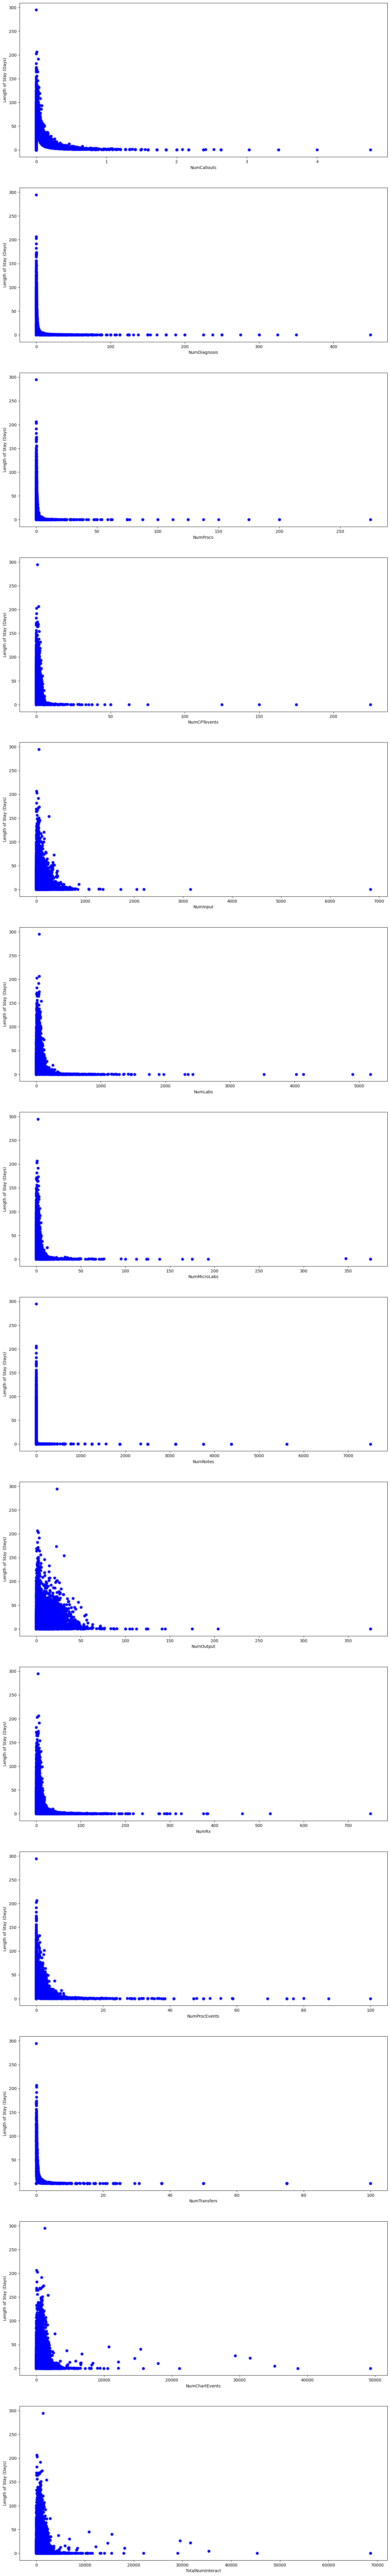

In [9]:
continuous_variables = ['NumCallouts', 'NumDiagnosis', 'NumProcs', 'NumCPTevents', 'NumInput', 'NumLabs', 'NumMicroLabs',
                        'NumNotes', 'NumOutput', 'NumRx', 'NumProcEvents', 'NumTransfers', 'NumChartEvents', 'TotalNumInteract']

continuous_figures, continuous_axes = plt.subplots(14, figsize = (16, 112)) # 8 * 14 = 112
for counter in range(14):
    continuous_axes[counter].plot(mimic_train[continuous_variables[counter]], mimic_train.LOSdays, 'bo')
    continuous_axes[counter].set_xlabel(continuous_variables[counter])
    continuous_axes[counter].set_ylabel("Length of Stay (Days)")

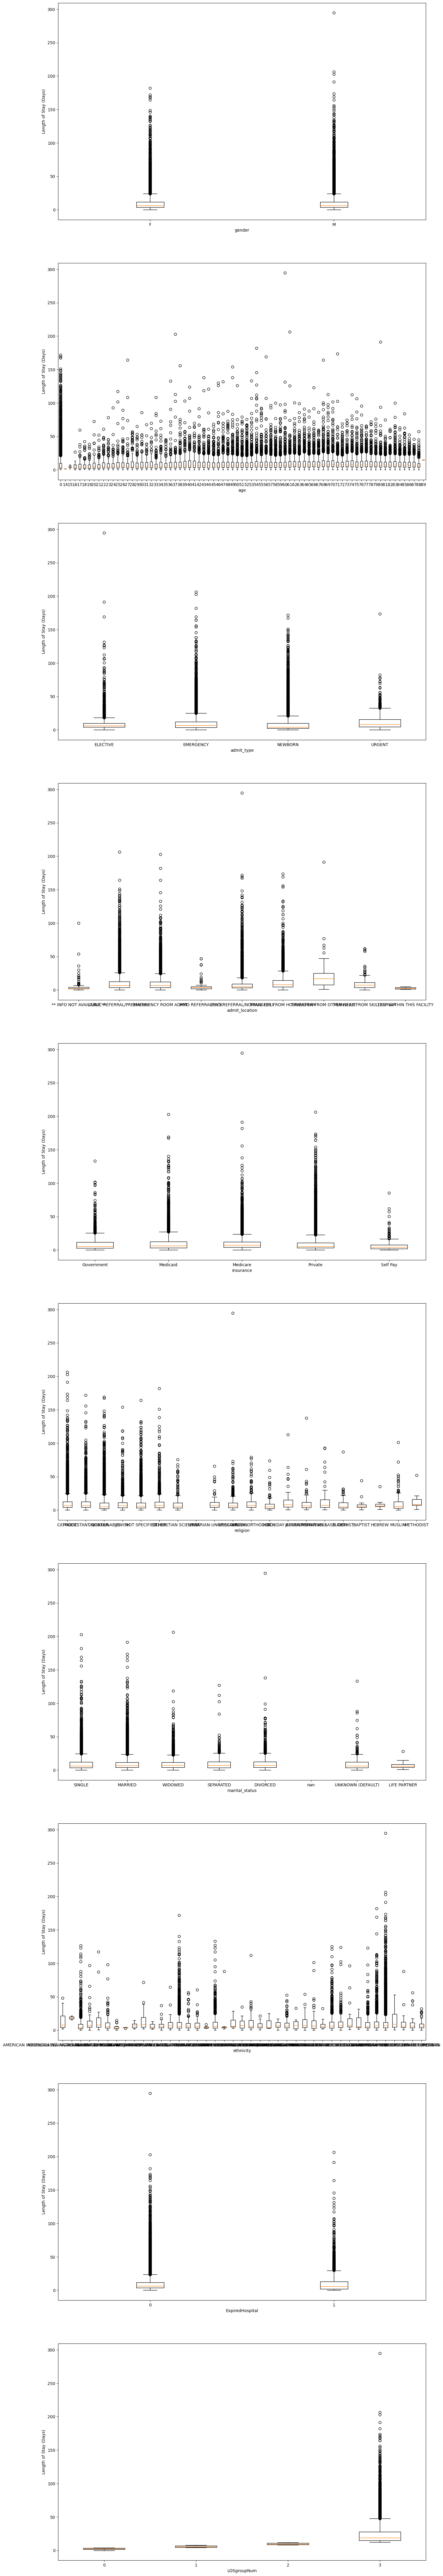

In [12]:
discrete_variables = ['gender', 'age', 'admit_type', 'admit_location', 'insurance', 'religion', 'marital_status',
                      'ethnicity', 'ExpiredHospital', 'LOSgroupNum']
# didn't include AdmitDiagnosis and AdmitProcedure

discrete_figures, discrete_axes = plt.subplots(10, figsize = (16, 112)) # 8 * 14 = 112
for counter in range(10):
    if (counter == 5 or counter == 6):
        variables = pd.unique(mimic_train[discrete_variables[counter]])
    else:
        variables = sorted(pd.unique(mimic_train[discrete_variables[counter]]))
        
    LOS_by_variable = []
    for variable in variables:
        LOS_by_variable.append(list(mimic_train[mimic_train[discrete_variables[counter]] == variable]['LOSdays']))
        
    discrete_axes[counter].boxplot(LOS_by_variable)
    discrete_axes[counter].set_xlabel(discrete_variables[counter])
    discrete_axes[counter].set_ylabel("Length of Stay (Days)")
    discrete_axes[counter].set_xticklabels(variables)

In [15]:
ages = sorted(pd.unique(mimic_train.age))
LOS_by_age = []
for age in ages:
    LOS_by_age.append(list(mimic_train[mimic_train['age'] == age]['LOSdays']))

Text(0, 0.5, 'Length of Stay (Days)')

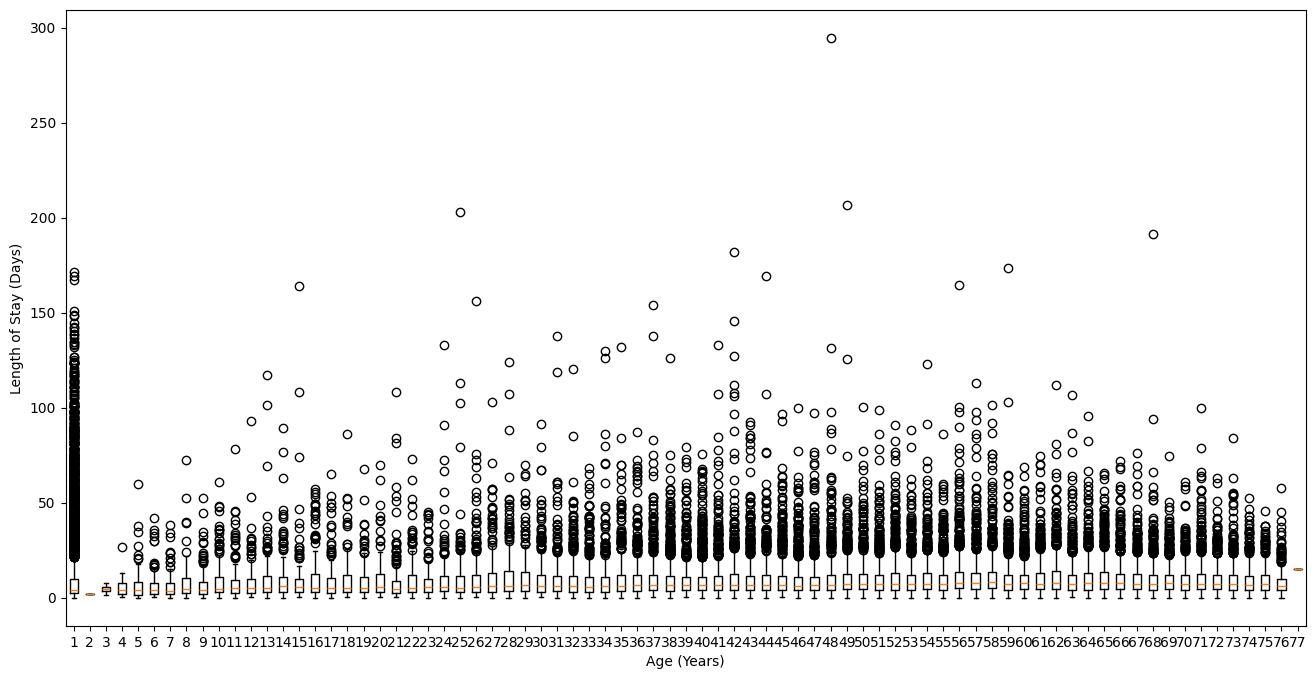

In [16]:
plt.figure(figsize = (16, 8))
plt.boxplot(LOS_by_age)
plt.xlabel('Age (Years)')
plt.ylabel('Length of Stay (Days)')

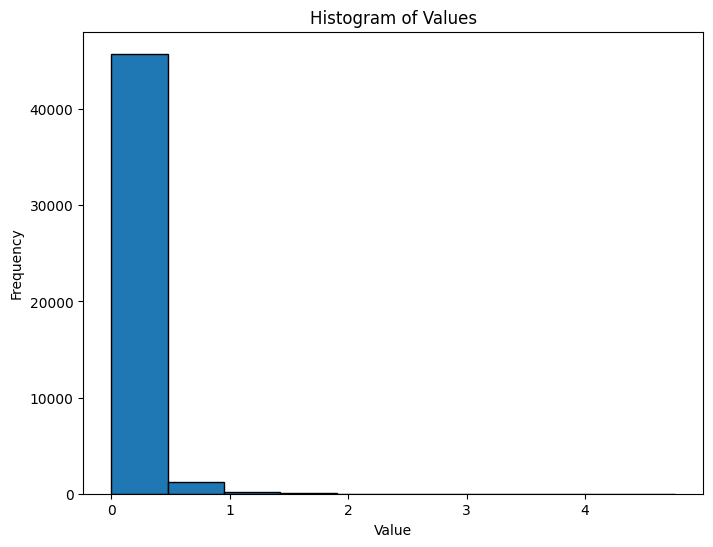

In [17]:
plt.figure(figsize=(8, 6))
plt.hist(mimic_train['NumCallouts'], bins=10, edgecolor='black')
plt.title('Histogram of Values')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

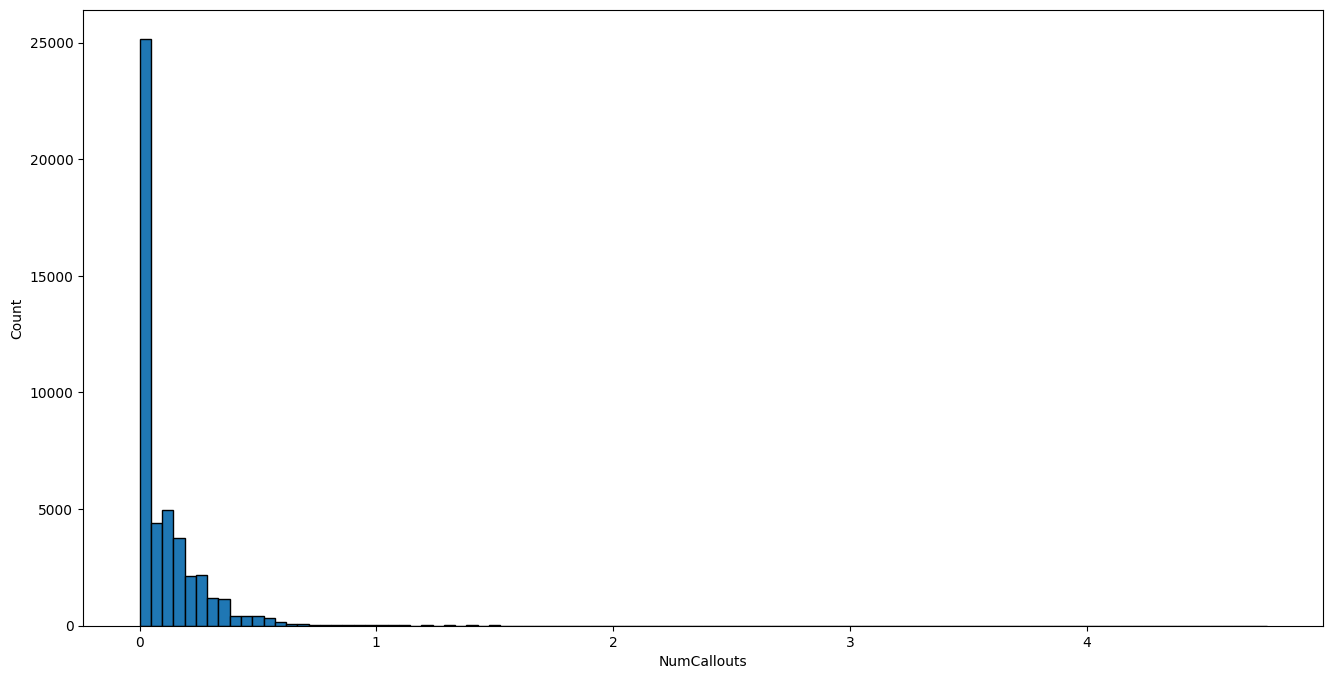

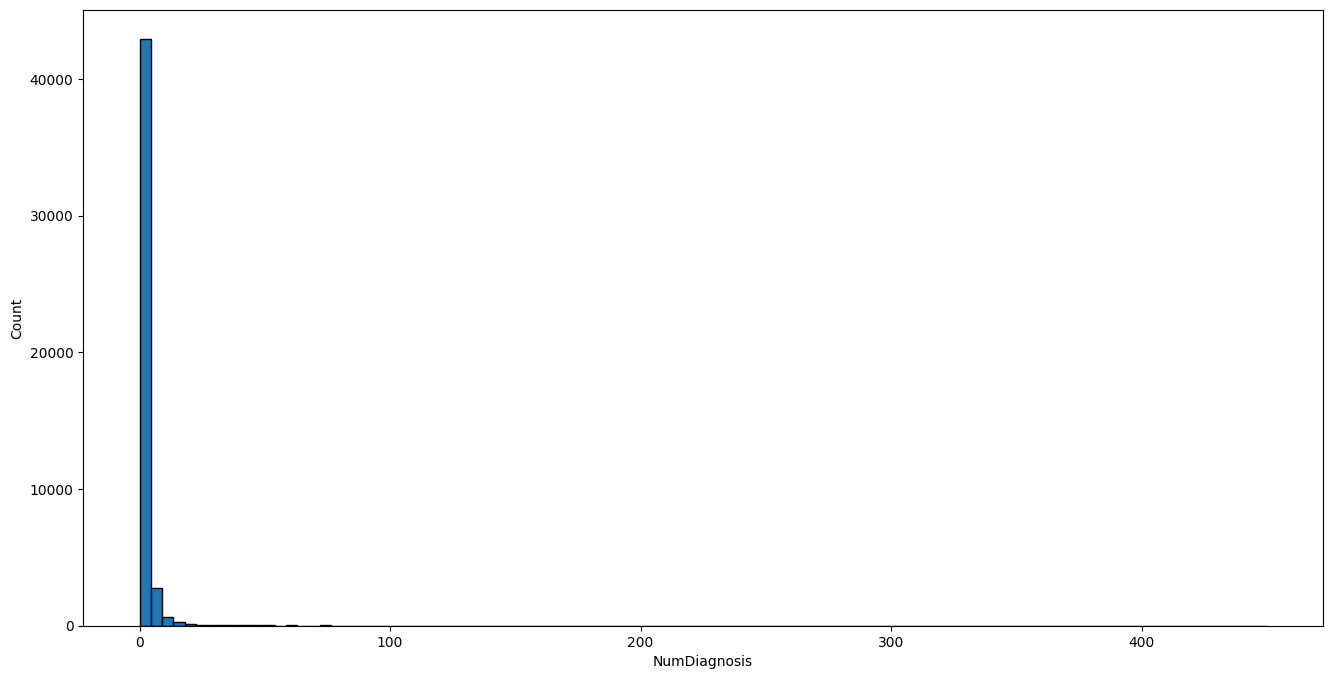

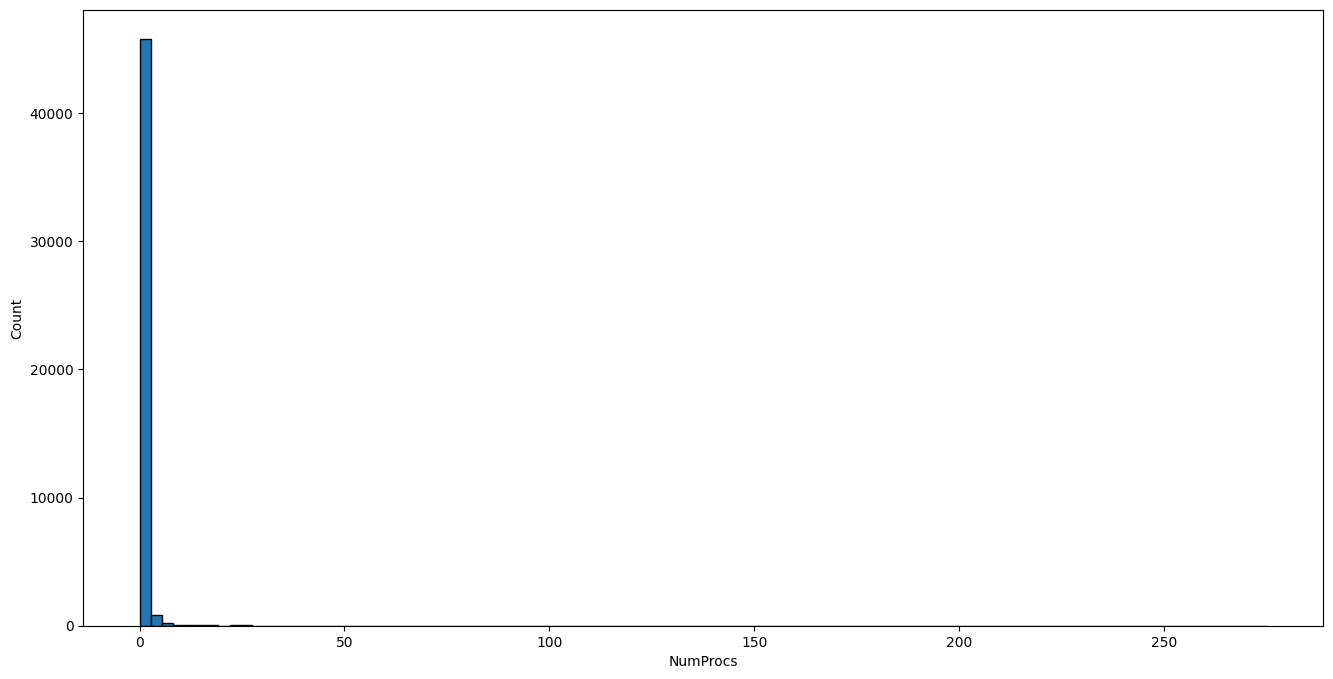

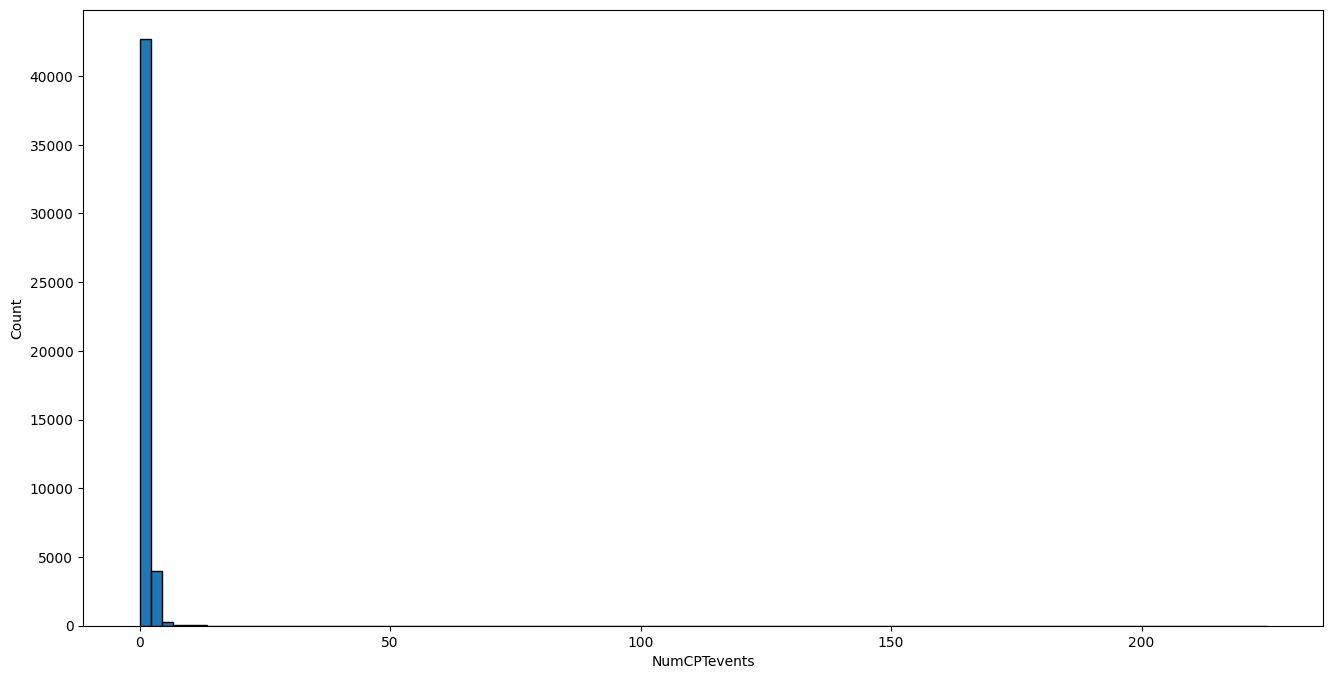

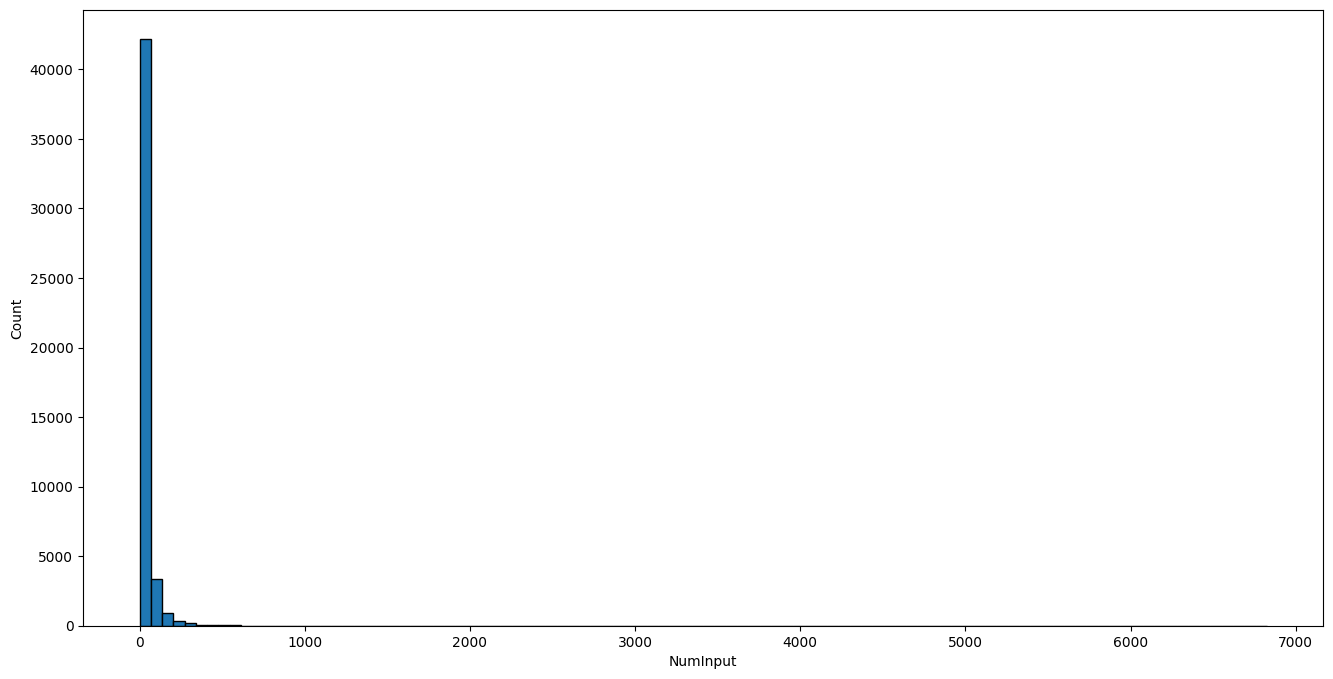

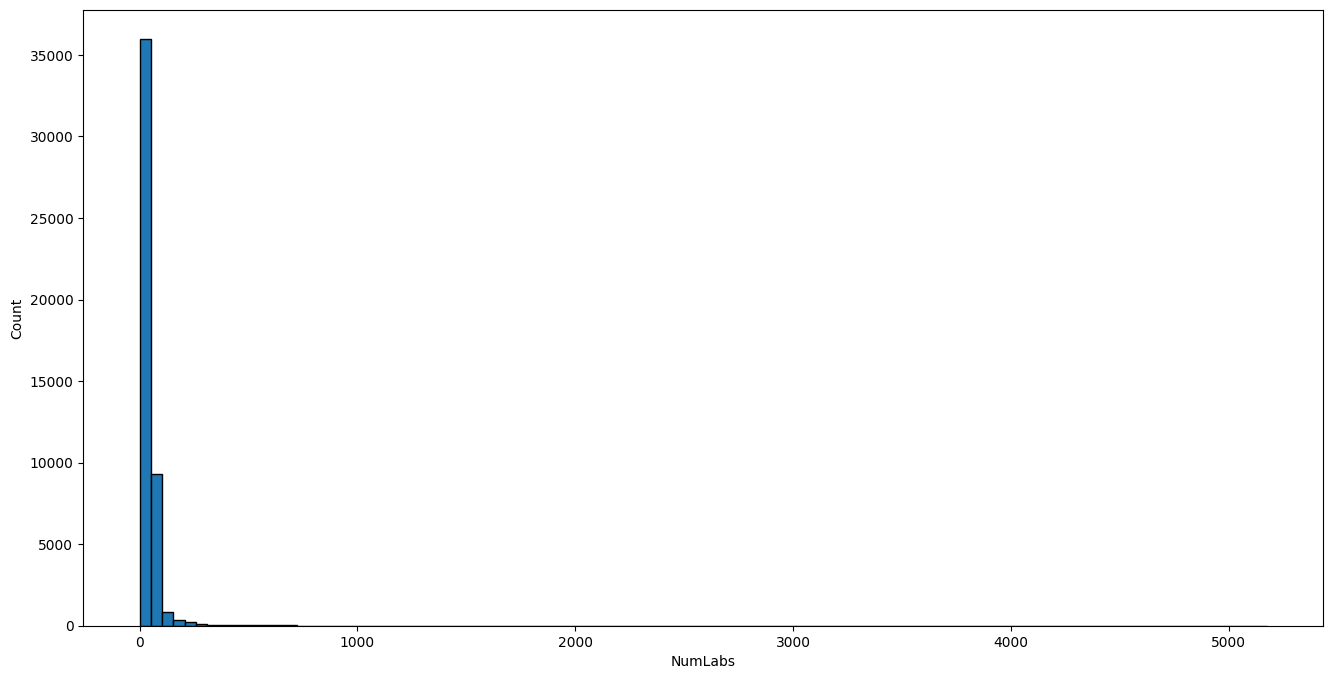

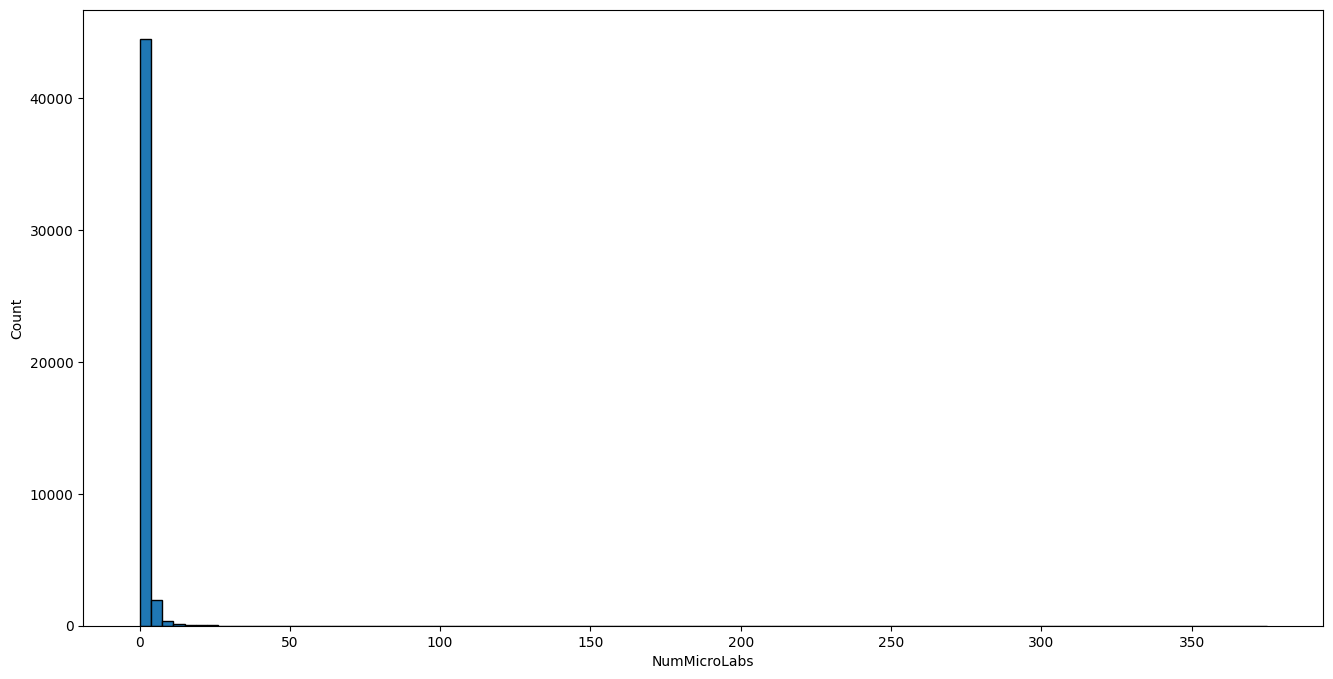

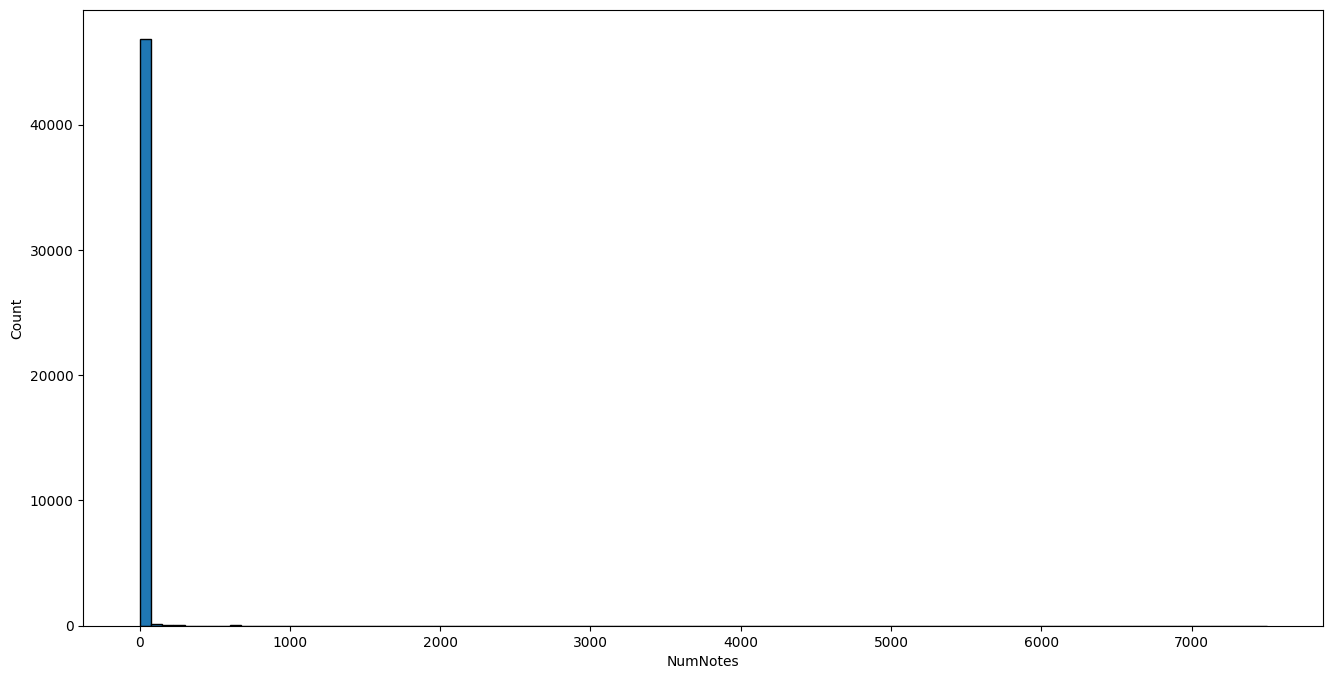

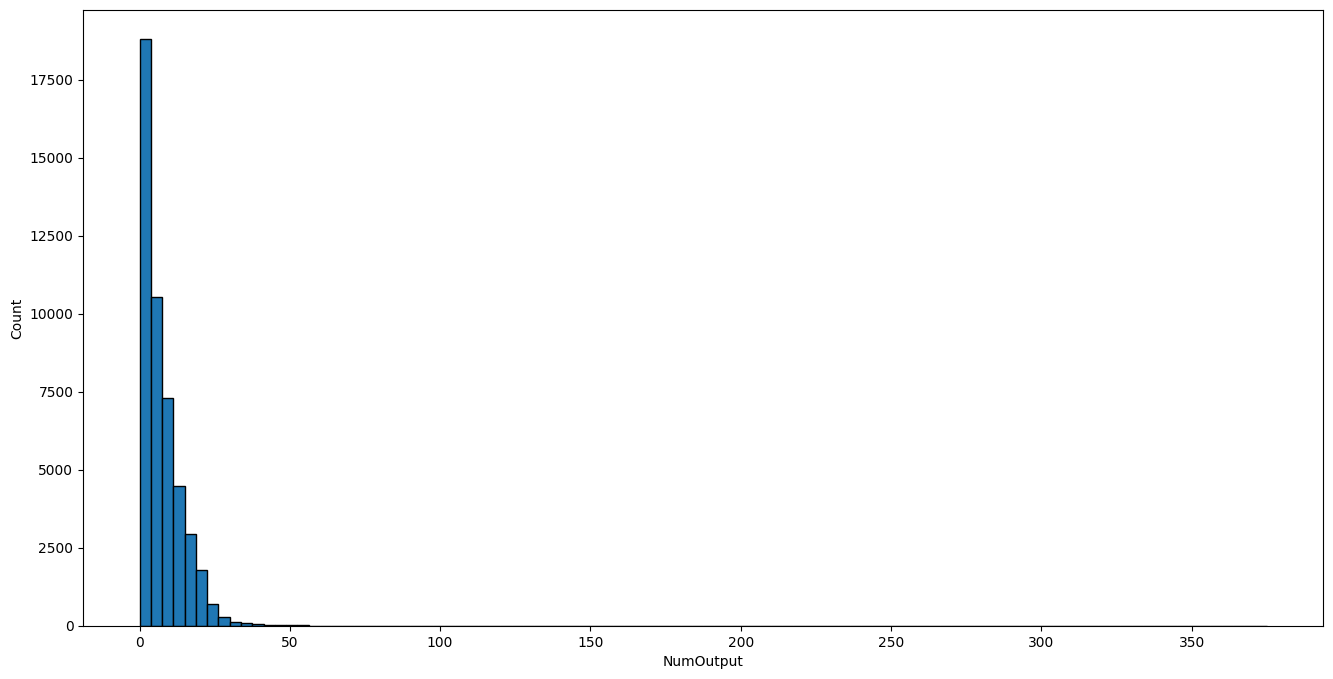

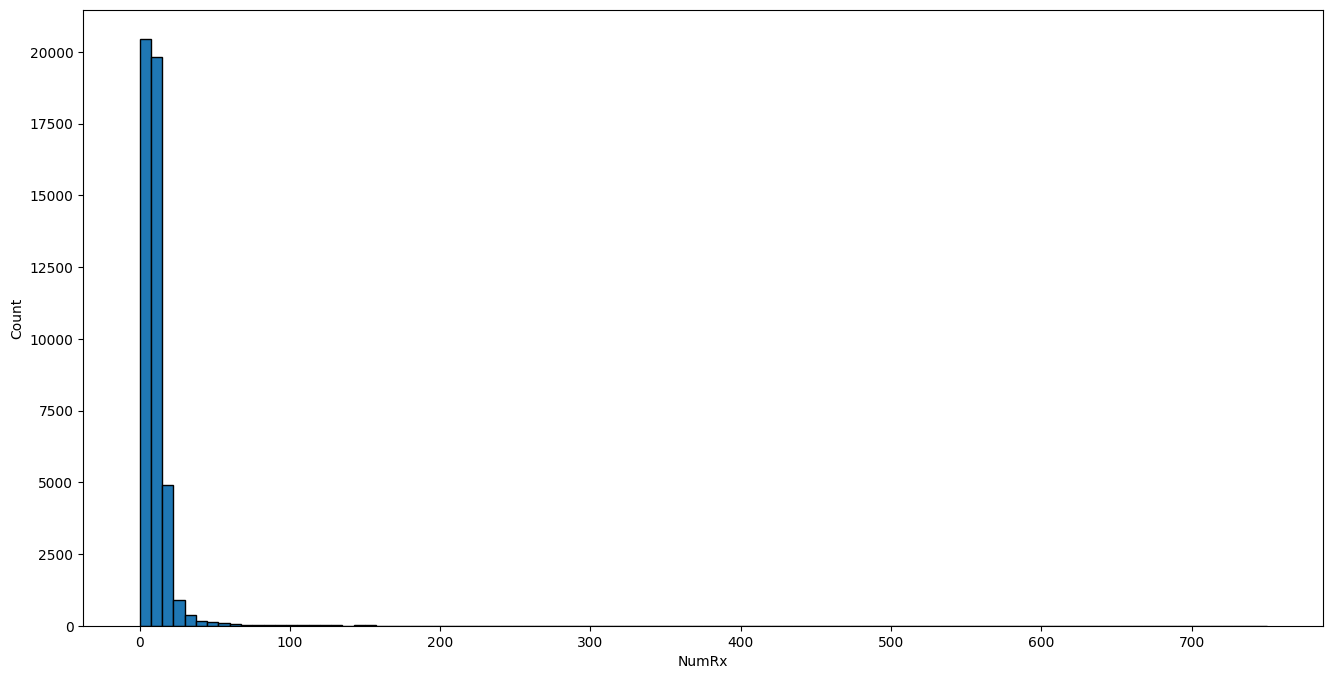

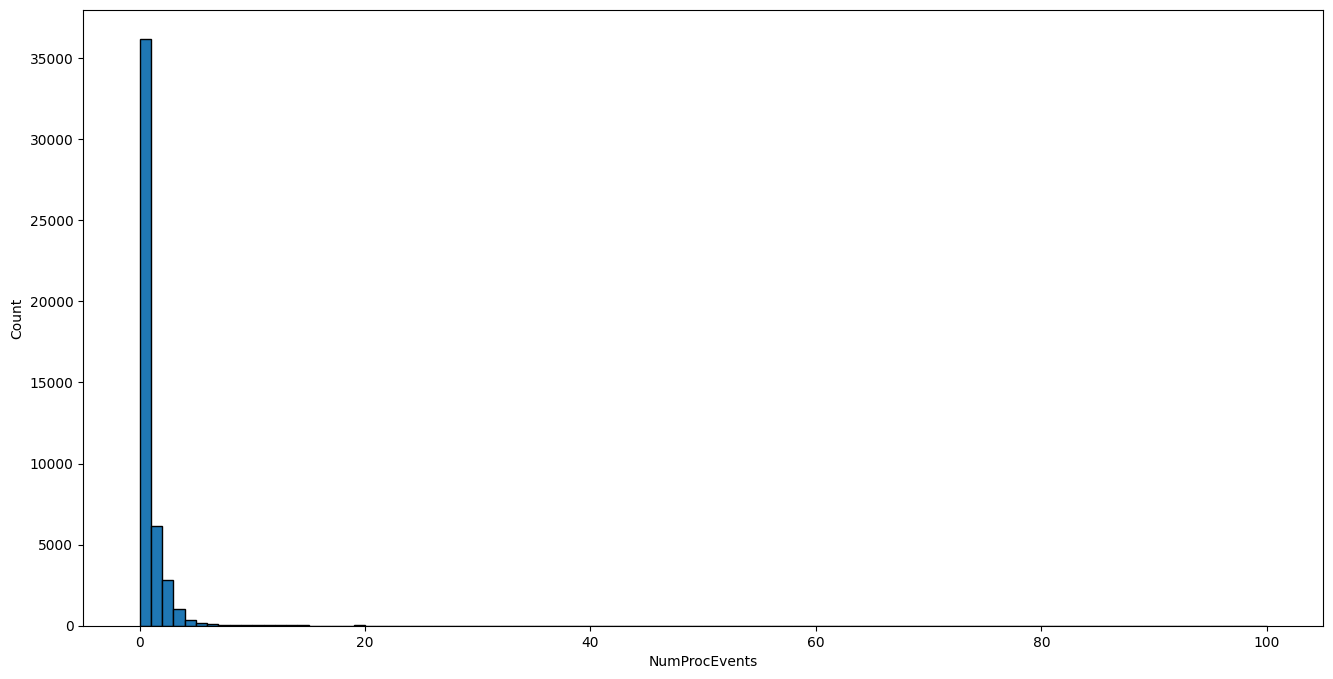

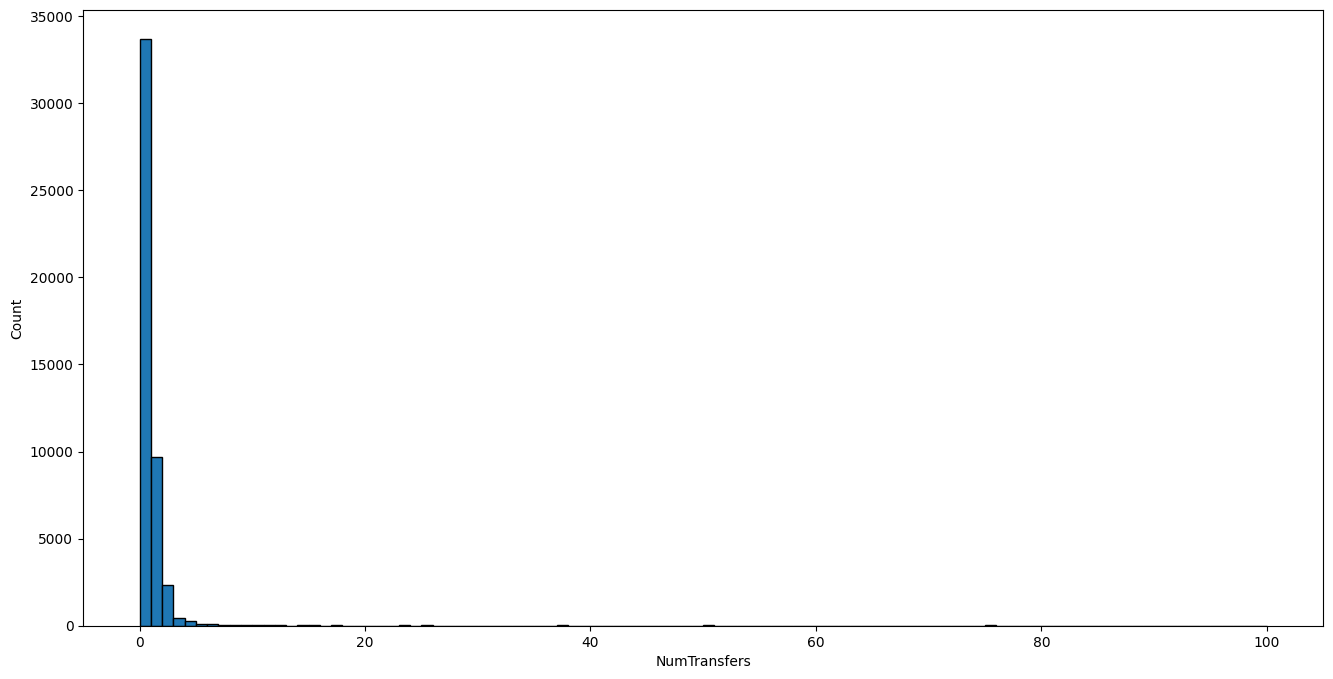

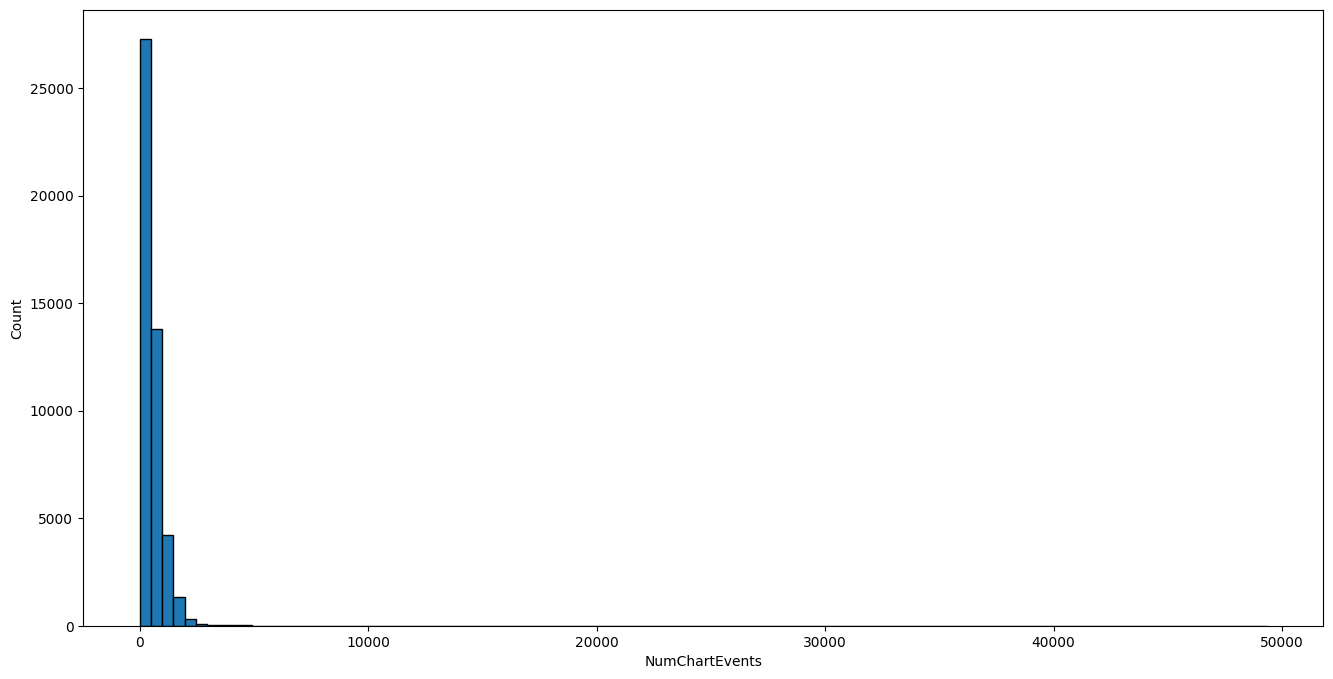

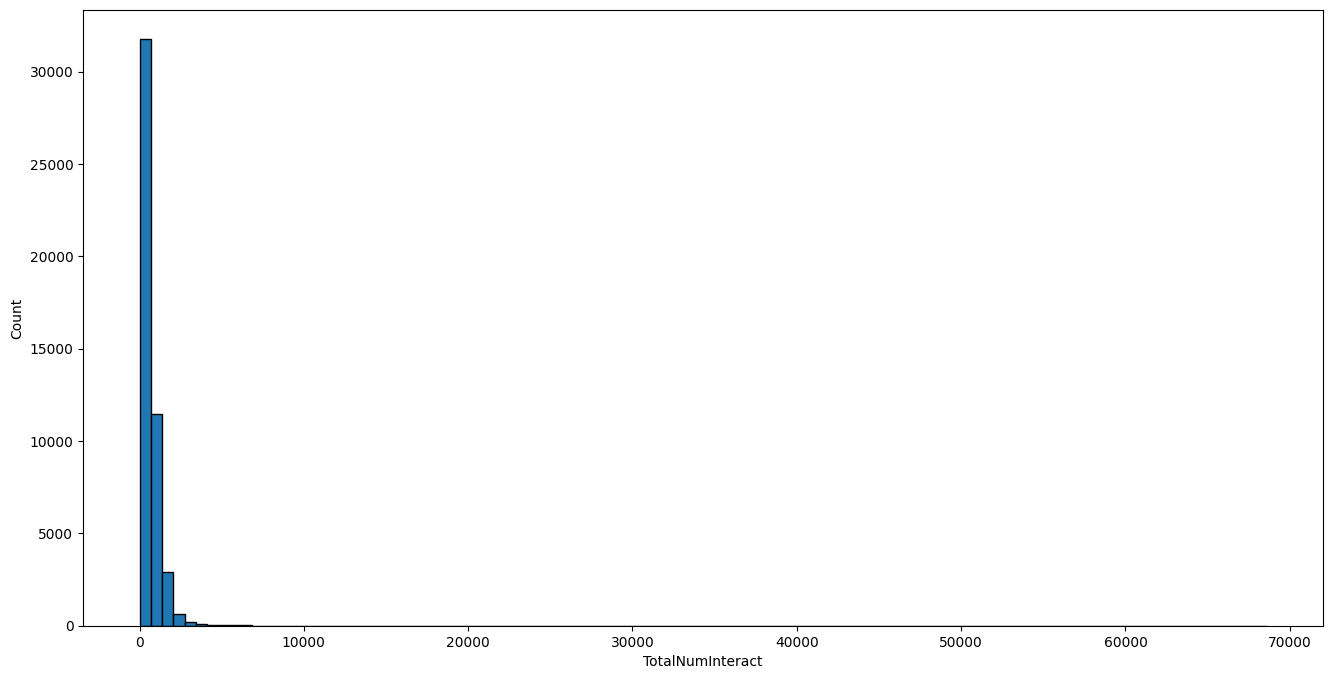

In [18]:
for counter in range(14):
    plt.figure(figsize = (16, 8))
    plt.hist(mimic_train[continuous_variables[counter]], edgecolor = "black", bins = 100)
    plt.xlabel(continuous_variables[counter])
    plt.ylabel('Count')
    plt.show()

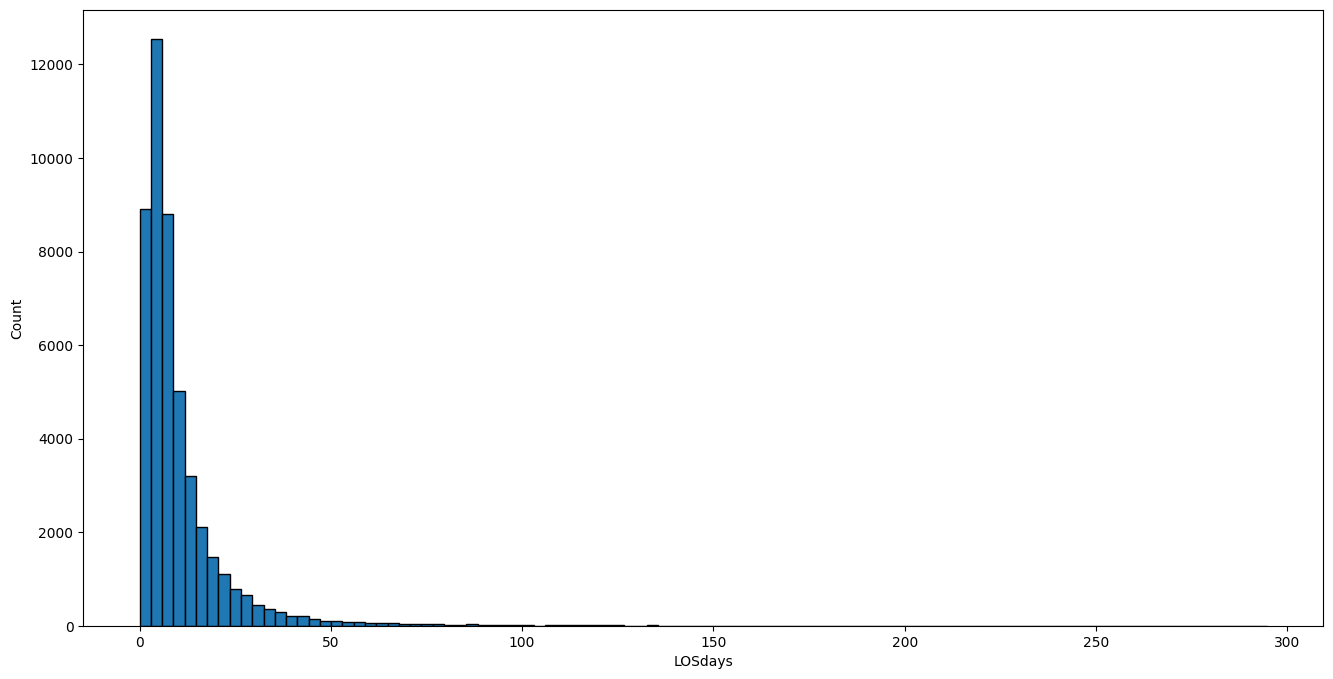

In [19]:
plt.figure(figsize = (16, 8))
plt.hist(mimic_train['LOSdays'], edgecolor = "black", bins = 100)
plt.xlabel('LOSdays')
plt.ylabel('Count')
plt.show()

In [52]:
for value in mimic_train.LOSdays:
    if value > 150:
        print(value)

171.63
155.92
153.88
167.42
173.71
202.75
169.17
169.13
150.75
181.88
164.33
206.42
191.42
294.63
164.25


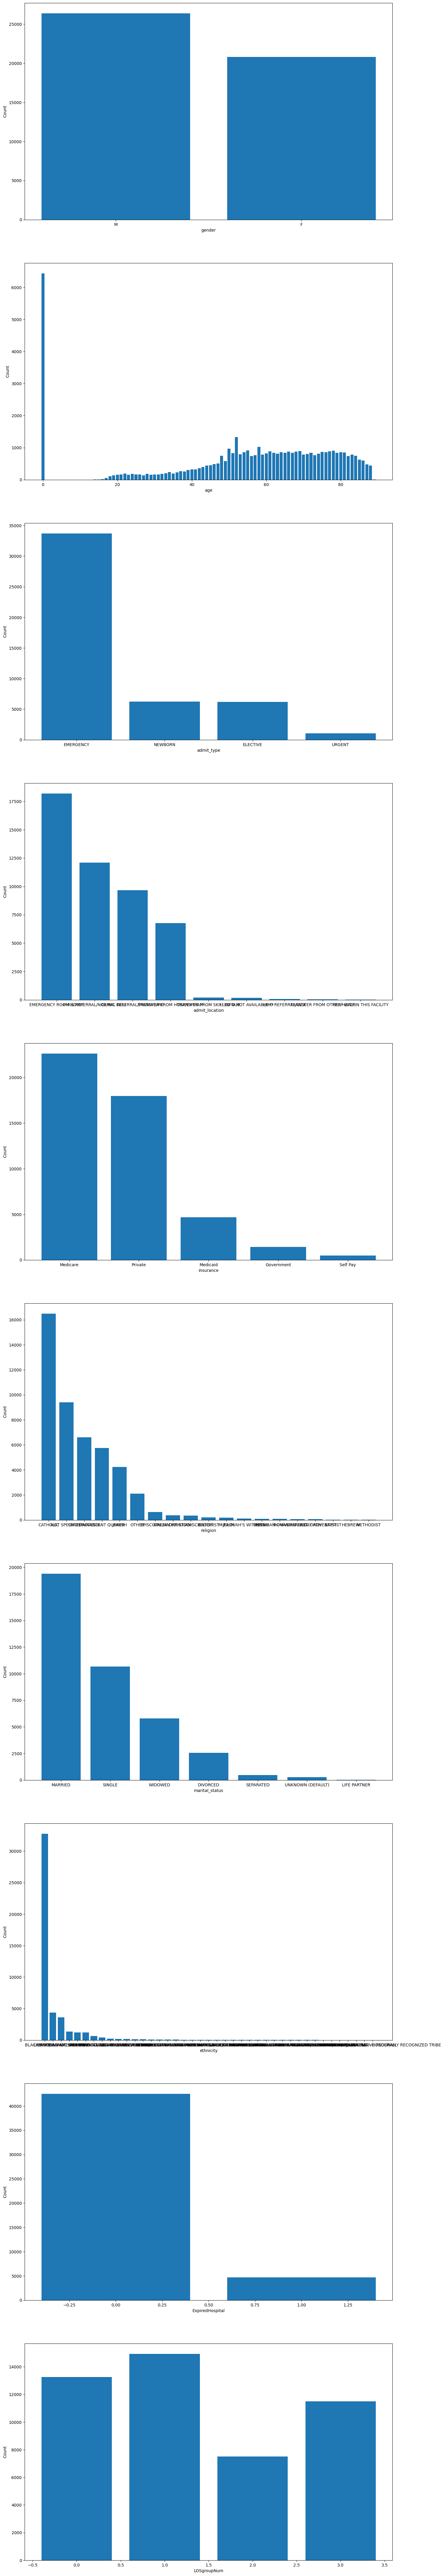

In [20]:
discrete_figures_counts, discrete_axes_counts = plt.subplots(10, figsize = (16, 112)) # 8 * 14 = 112
for counter in range(10):
    counts = mimic_train[discrete_variables[counter]].value_counts()
    discrete_axes_counts[counter].bar(counts.index, counts.values)
    discrete_axes_counts[counter].set_xlabel(discrete_variables[counter])
    discrete_axes_counts[counter].set_ylabel('Count')

C:\Users\micic\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\micic\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


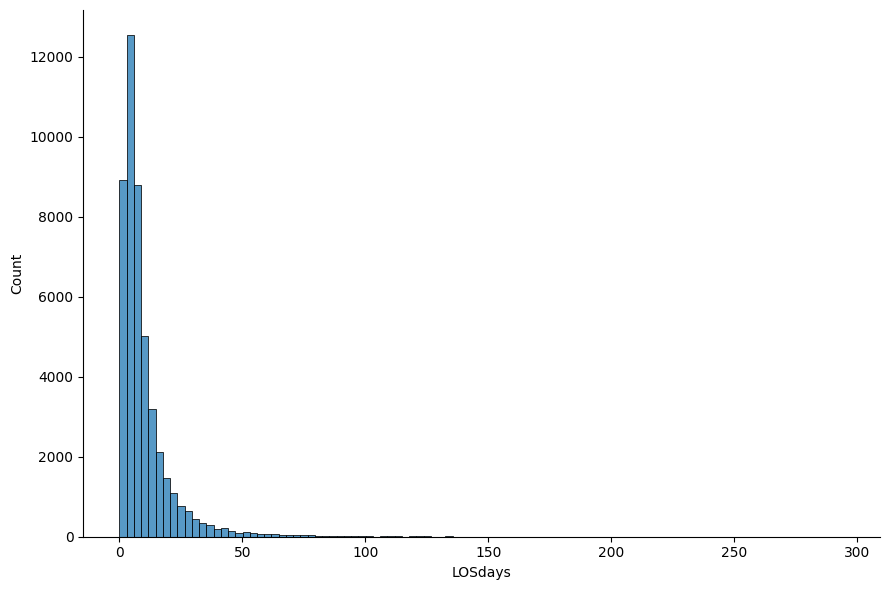

In [21]:
#https://medium.com/the-researchers-guide/finding-the-best-distribution-that-fits-your-data-using-pythons-fitter-library-319a5a0972e9

import numpy as np
import seaborn as sns
from fitter import Fitter, get_common_distributions, get_distributions

sns.displot(data=mimic_train, x="LOSdays", kind="hist", bins = 100, aspect = 1.5, height=6)

In [22]:
LOSdays_array = mimic_train['LOSdays'].values

Text(0, 0.5, 'Probability Density')

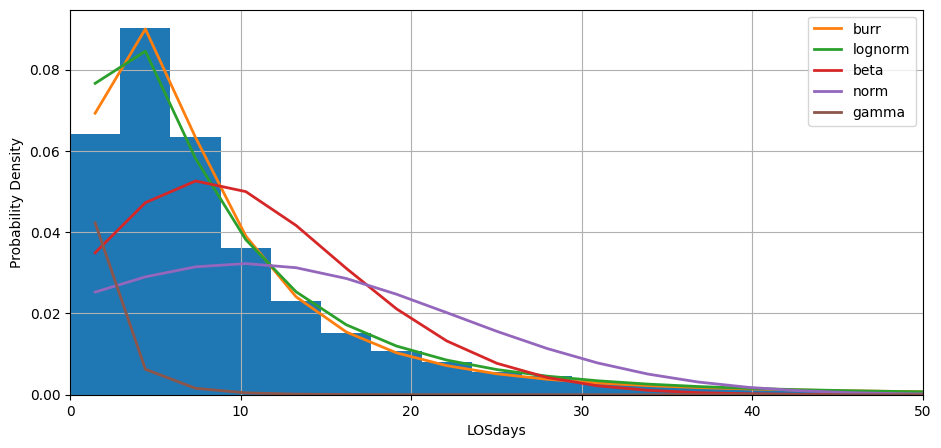

In [62]:
distribution_fitter = Fitter(LOSdays_array, distributions=['gamma',
                          'lognorm',
                          "beta",
                          "burr",
                          "norm"])
distribution_fitter.fit()
plt.figure(figsize=(11, 5))
distribution_fitter.summary()
plt.xlim(0, 50)
plt.xlabel('LOSdays')
plt.ylabel('Probability Density')

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
chi2,0.012187,6724.239244,6750.524483,inf,0.598563,0.0


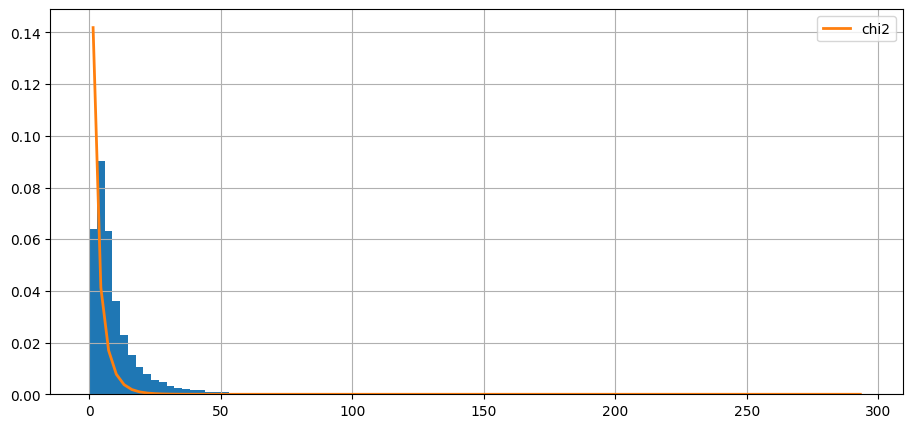

In [25]:
distribution_fitter = Fitter(LOSdays_array, distributions=["chi2"])
distribution_fitter.fit()
plt.figure(figsize=(11, 5))
distribution_fitter.summary()

In [24]:
distribution_fitter.get_best(method = 'sumsquare_error')

# output
# {'burr': {'c': 1.9913044548887577,
# 'd': 0.8892526941913488,
# 'loc': -0.16196863288848262,
# 'scale': 7.328543418811263}}

{'burr': {'c': 1.9913044548887577,
  'd': 0.8892526941913488,
  'loc': -0.16196863288848262,
  'scale': 7.328543418811263}}

SKIPPED _fit distribution (taking more than 30 seconds)
SKIPPED exponweib distribution (taking more than 30 seconds)
SKIPPED f distribution (taking more than 30 seconds)
SKIPPED fisk distribution (taking more than 30 seconds)
SKIPPED gausshyper distribution (taking more than 30 seconds)
SKIPPED genexpon distribution (taking more than 30 seconds)
SKIPPED genextreme distribution (taking more than 30 seconds)
SKIPPED gengamma distribution (taking more than 30 seconds)
SKIPPED genhalflogistic distribution (taking more than 30 seconds)
SKIPPED genhyperbolic distribution (taking more than 30 seconds)
SKIPPED geninvgauss distribution (taking more than 30 seconds)
SKIPPED genlogistic distribution (taking more than 30 seconds)
SKIPPED kstwo distribution (taking more than 30 seconds)
SKIPPED genpareto distribution (taking more than 30 seconds)
SKIPPED gompertz distribution (taking more than 30 seconds)
SKIPPED invgamma distribution (taking more than 30 seconds)
SKIPPED invweibull distribution (t

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
burr,0.000039,1933.485399,1968.532385,inf,0.019191,1.587054e-15
burr12,0.000043,1945.937266,1980.984252,inf,0.019030,2.841906e-15
norminvgauss,0.000053,2386.373800,2421.420787,inf,0.021815,6.160641e-20
loglaplace,0.000203,1783.576143,1809.861383,inf,0.033039,3.534879e-45
laplace_asymmetric,0.000379,3672.365231,3698.650470,inf,0.070300,3.377483e-203


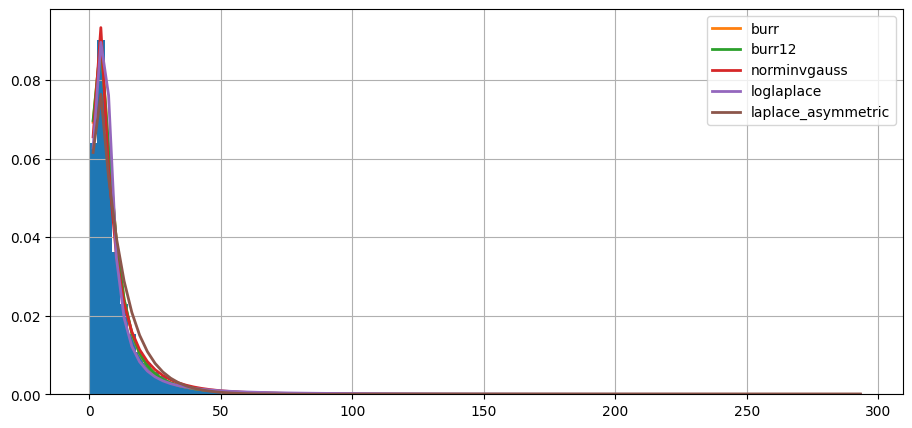

In [28]:
distribution_fitter = Fitter(LOSdays_array)
distribution_fitter.fit()
plt.figure(figsize=(11, 5))
distribution_fitter.summary()